# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

#### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

#### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

#### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


Import libraries and data

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

import warnings
warnings.filterwarnings('ignore')

#import data
profiles = pd.read_csv("profiles.csv")
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

`profiles` has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning.


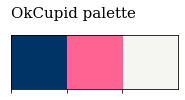

In [151]:
# set palette
palette = ["#003366", "#FF6392"]

sns.palplot(["#003366", "#FF6392", "#f5f5f1"])
plt.title("OkCupid palette ", loc='left',
          fontfamily='serif', fontsize=15, y=1.2)
plt.show()

## Investigate the data

In [152]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [153]:
#lets get all the columns in the dataframe
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [154]:
#Investigate the first 3 rows
profiles.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


In [155]:
#Investigate the last 3 rows
profiles.tail(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,...,"south san francisco, california",doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single
59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,it used to be the hair until i mowed it off bu...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",single
59945,39,average,NaN,socially,NaN,graduated from masters program,"is it odd that having a little ""enemy"" status ...",i work with elderly people (psychotherapy and ...,i'm a great bullshitter. i don't know what it ...,"either that i am funny/sarcastic, or that i am...",...,"san francisco, california",NaN,gay,likes dogs and likes cats,catholicism and laughing about it,m,gemini and it&rsquo;s fun to think about,sometimes,english,single


### Age

In [156]:
#Lets see the range of ages, who's the yooungest and the oldest
print("The youngest: ", np.min(profiles.age))
print("The oldest: ", np.max(profiles.age))

The youngest:  18
The oldest:  110


this is definetely a mistake, there is no way someone can be 110 years old, lets investigate this row

In [157]:
print(profiles[profiles.age == 110])

      age body_type diet drinks drugs education essay0 essay1 essay2 essay3  \
2512  110       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   

      ...               location offspring orientation pets religion sex sign  \
2512  ...  daly city, california       NaN    straight  NaN      NaN   f  NaN   

      smokes   speaks  status  
2512     NaN  english  single  

[1 rows x 31 columns]


Yeah, it does look like a mistake, lets looks at the distributions.

Text(0.95, 0.8, 'Data is right skewed, users\nare in their late 20s or early 30s,\nwith a mean age of 32.0 ')

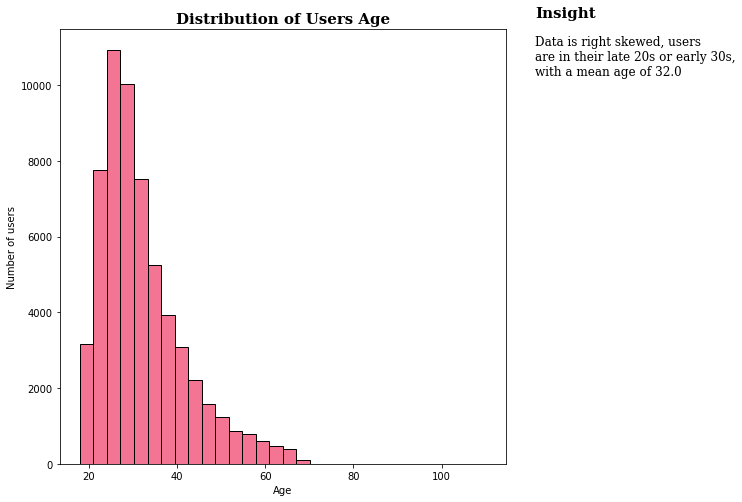

In [158]:
#Plot histogram
plt.figure(figsize=(8,8))
sns.histplot(profiles.age, bins=30,  color= "#EF476F")
plt.ylabel("Number of users")
plt.xlabel("Age")
plt.title( 'Distribution of Users Age', loc= "center",
         fontsize=15, fontweight='bold', fontfamily='serif')
plt.figtext(0.95, 0.9,  '''Insight''', fontsize=15, fontweight='bold', fontfamily='serif')
plt.figtext(0.95, 0.8,  '''Data is right skewed, users
are in their late 20s or early 30s,
with a mean age of {} ''' .format(np.round(np.mean(profiles.age),0)),
            fontsize=12, fontweight='light', fontfamily='serif')

Text(0.95, 0.75, 'Data is right skewed, users are\nin their late 20s or early 30s\nand their are mostly man ')

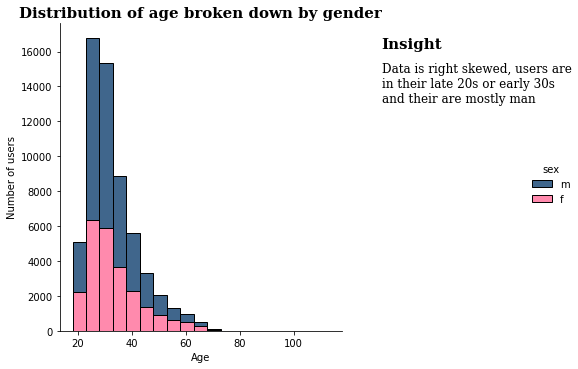

In [159]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist",
            binwidth=5, multiple="stack", palette= palette)
plt.title('Distribution of age broken down by gender', loc= "center",
         fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel("Number of users")
plt.xlabel("Age")
plt.figtext(0.95, 0.9,  '''Insight''', fontsize=15, fontweight='bold', fontfamily='serif')
plt.figtext(0.95, 0.75,  '''Data is right skewed, users are
in their late 20s or early 30s
and their are mostly man ''',
            fontsize=12, fontweight='light', fontfamily='serif')

In [160]:
#how many users are older than 70 yo
over70 = profiles.apply(lambda x: True if x["age"] >= 70 else False, axis=1)
num_rows = len(over70[over70 == True].index)
print('Number of People older than 70 : ',
      num_rows)

Number of People older than 70 :  2


In [161]:
#lets take a look at those rows where age is > 70
print((profiles[profiles["age"] >= 70]))

       age body_type          diet drinks  drugs                   education  \
2512   110       NaN           NaN    NaN    NaN                         NaN   
25324  109  athletic  mostly other    NaN  never  working on masters program   

      essay0 essay1 essay2   essay3  ...                   location  \
2512     NaN    NaN    NaN      NaN  ...      daly city, california   
25324    NaN    NaN    NaN  nothing  ...  san francisco, california   

             offspring orientation pets                             religion  \
2512               NaN    straight  NaN                                  NaN   
25324  might want kids    straight  NaN  other and somewhat serious about it   

      sex                                  sign         smokes  \
2512    f                                   NaN            NaN   
25324   m  aquarius but it doesn&rsquo;t matter  when drinking   

               speaks     status  
2512          english     single  
25324  english (okay)  available  


In [162]:
#create categories for ages
category = pd.cut(profiles['age'], bins=[18, 20, 30, 40, 50, 60, 70],
right=False, labels=["+18", "20_30", "30_40", "40_50", "50_60", "over70"])
profiles.insert(2, "Age_group", category)
profiles.head(3)

,age,body_type,Age_group,diet,drinks,drugs,education,essay0,essay1,essay2,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,20_30,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,30_40,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,30_40,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


,Age_group
20_30,0.464117
30_40,0.331076
40_50,0.122414
50_60,0.047711
over70,0.019335
+18,0.015348


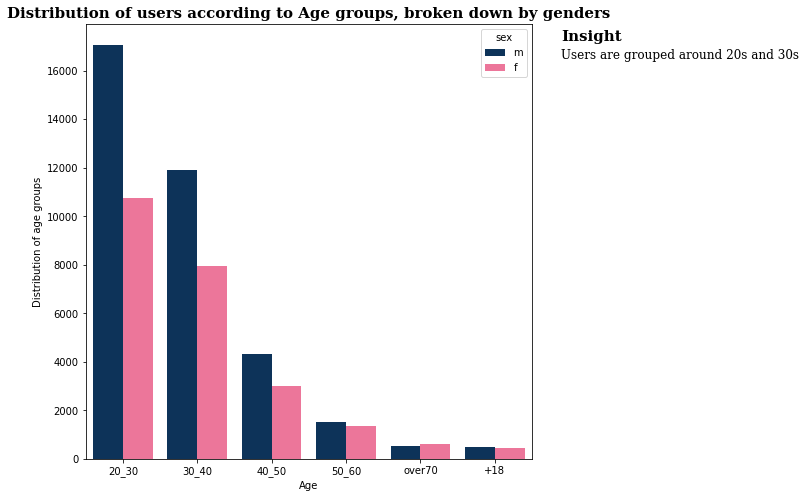

In [163]:
## Plot distributions of age groups
plt.figure(figsize=(8,8))
sns.countplot(profiles["Age_group"], hue=profiles["sex"], palette = palette, order = profiles['Age_group'].value_counts().index)
plt.title('Distribution of users according to Age groups, broken down by genders', loc= "center",
         fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel("Distribution of age groups")
plt.xlabel("Age")
plt.figtext(0.95, 0.85, '''Insight''', fontsize=15, fontweight='bold', fontfamily='serif')
plt.figtext(0.95, 0.82, '''Users are grouped around 20s and 30s''',
            fontsize=12, fontweight='light', fontfamily='serif')

#Dataframe Age groups
pd.DataFrame(profiles["Age_group"].value_counts(normalize=True))

## Body Type

,body_type
average,0.244420
fit,0.212041
athletic,0.197161
NaN,0.088346
thin,0.078587
curvy,0.065459
a little extra,0.043856
skinny,0.029643
full figured,0.016832
overweight,0.007407


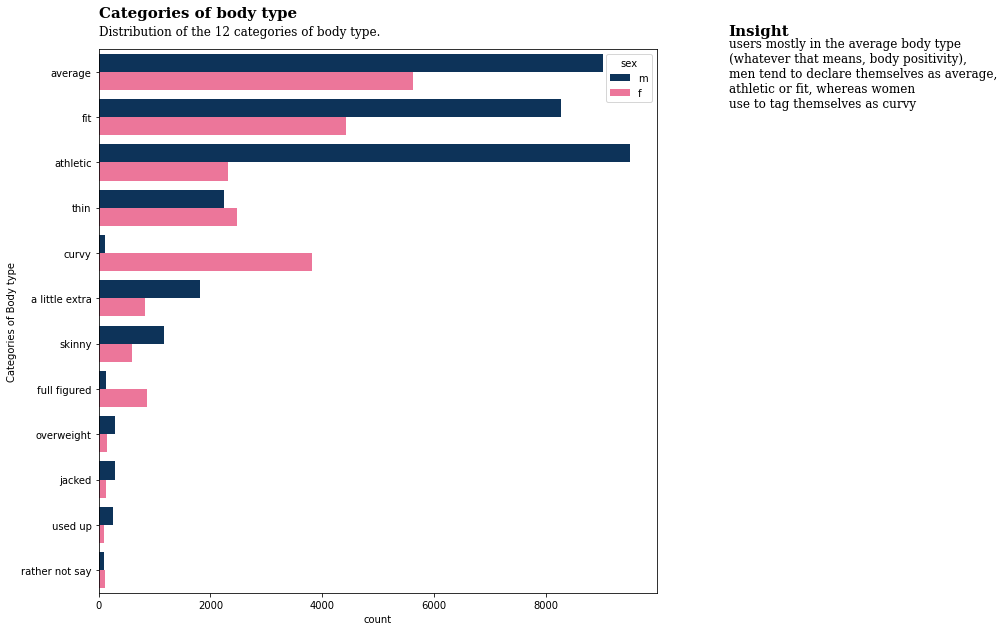

In [164]:
## Plot distributions of age groups
categories = profiles.body_type.nunique()
plt.figure(figsize=(10,10))
sns.countplot(y=profiles.body_type, hue= profiles.sex, palette=palette, order = profiles['body_type'].value_counts().index)
plt.ylabel("Categories of Body type")
plt.text(0.5, -1.2, 'Categories of body type',
         fontsize=15, fontweight='bold', fontfamily='serif')
plt.text(0.5, -0.8, 'Distribution of the {} categories of body type.' .format(categories),
fontsize=12, fontweight='light', fontfamily='serif')
plt.figtext(1, 0.9,  '''Insight''', fontsize=15, fontweight='bold', fontfamily='serif')
plt.figtext(1, 0.8,  '''users mostly in the average body type
(whatever that means, body positivity),
men tend to declare themselves as average,
athletic or fit, whereas women
use to tag themselves as curvy ''',
            fontsize=12, fontweight='light', fontfamily='serif')

pd.DataFrame(profiles["body_type"].value_counts(normalize=True, dropna=False))


### Orientation

Text(0.5, 1.0, 'Orientation')

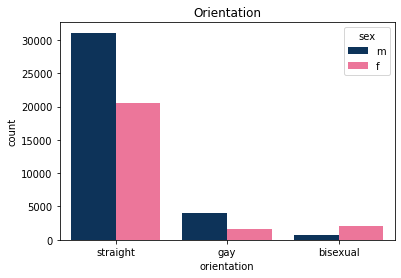

In [165]:
profiles["orientation"].value_counts(normalize=True)
sns.countplot(profiles["orientation"], hue=profiles["sex"], palette=palette, order = profiles['orientation'].value_counts().index)
plt.title("Orientation")

### Sex

<AxesSubplot:xlabel='count', ylabel='sex'>

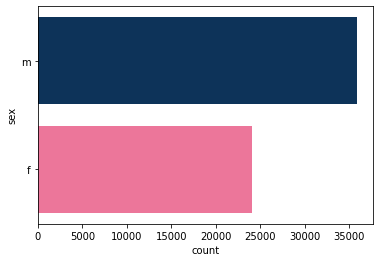

In [166]:
sns.countplot(y =profiles.sex, palette=palette)

### Height

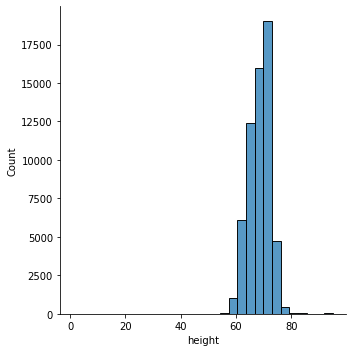

In [167]:
sns.displot(profiles.height, bins=30, kind="hist")

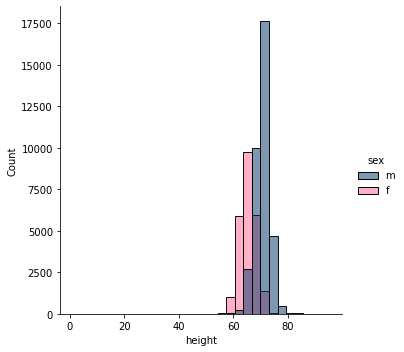

In [168]:
sns.displot(data= profiles, x="height", hue= "sex", bins=30, kind="hist", palette=palette)

## Drugs

,drugs
never,0.629300
NaN,0.234878
sometimes,0.128983
often,0.006839


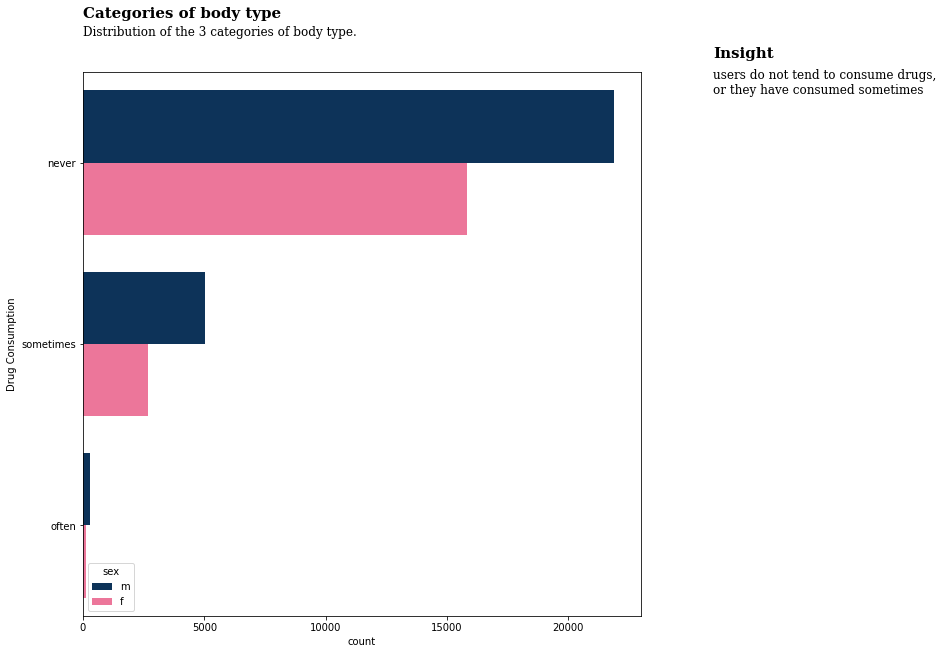

In [169]:
## Plot distributions of age groups
categories = profiles.drugs.nunique()

plt.figure(figsize=(10, 10))
sns.countplot(y=profiles.drugs, hue=profiles.sex, palette=palette, order = profiles['drugs'].value_counts().index)
plt.ylabel("Drug Consumption")
plt.text(0.5, -0.8, 'Categories of body type',
         fontsize=15, fontweight='bold', fontfamily='serif')
plt.text(0.5, -0.7, 'Distribution of the {} categories of body type.' .format(categories),
         fontsize=12, fontweight='light', fontfamily='serif')
plt.figtext(1, 0.9,  '''Insight''', fontsize=15,
            fontweight='bold', fontfamily='serif')
plt.figtext(1, 0.85,  '''users do not tend to consume drugs,
or they have consumed sometimes ''',
            fontsize=12, fontweight='light', fontfamily='serif')

pd.DataFrame(profiles["drugs"].value_counts(normalize=True, dropna=False))


## etchnicity

,status
single,0.929120
seeing someone,0.034431
available,0.031111
married,0.005171
unknown,0.000167


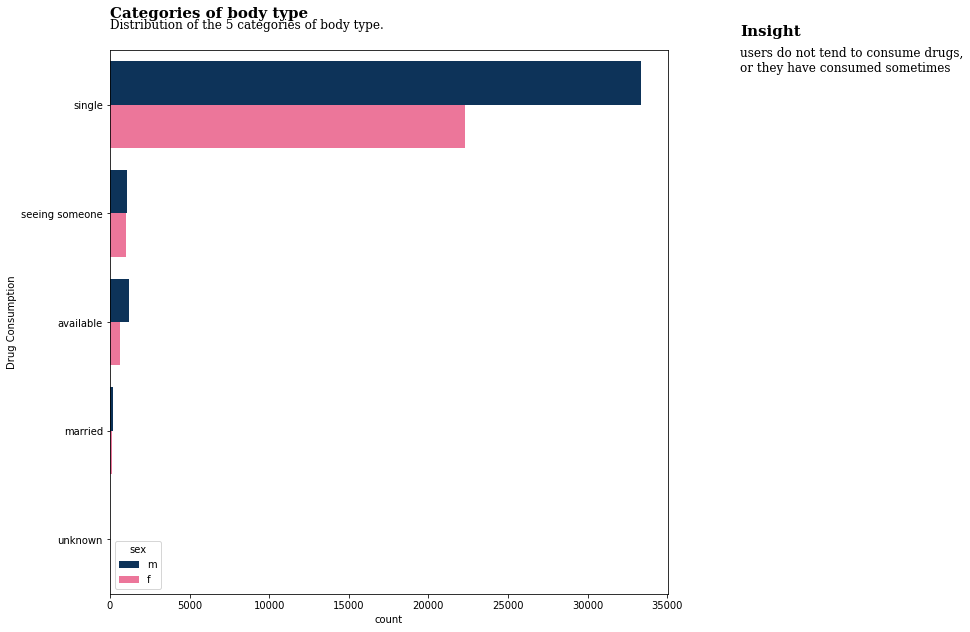

In [170]:
## Plot distributions of age groups
categories = profiles.status.nunique()

plt.figure(figsize=(10, 10))
sns.countplot(y=profiles.status, hue=profiles.sex, palette=palette, order = profiles['status'].value_counts().index)
plt.ylabel("Drug Consumption")
plt.text(0.5, -0.8, 'Categories of body type',
         fontsize=15, fontweight='bold', fontfamily='serif')
plt.text(0.5, -0.7, 'Distribution of the {} categories of body type.' .format(categories),
         fontsize=12, fontweight='light', fontfamily='serif')
plt.figtext(1, 0.9,  '''Insight''', fontsize=15,
            fontweight='bold', fontfamily='serif')
plt.figtext(1, 0.85,  '''users do not tend to consume drugs,
or they have consumed sometimes ''',
            fontsize=12, fontweight='light', fontfamily='serif')

pd.DataFrame(profiles["status"].value_counts(normalize=True, dropna=False))


## Religions

In [180]:
## Investigate religions
pd.DataFrame(profiles["religion"].value_counts(normalize=True, dropna=False))


,religion
NaN,0.337404
agnosticism,0.045441
other,0.044890
agnosticism but not too serious about it,0.043973
agnosticism and laughing about it,0.041637
catholicism but not too serious about it,0.038668
atheism,0.036283
other and laughing about it,0.035348
atheism and laughing about it,0.034598
christianity,0.032646


In [172]:
#Clean religion column

profiles['religion_clean'] = profiles.religion.str.split().str.get(0)
print("Number of categories in Signs:",profiles.religion_clean.nunique())
print("categories:", profiles.religion_clean.unique())

profiles.religion_clean.value_counts()

Number of categories in Signs: 9
categories: ['agnosticism' nan 'atheism' 'christianity' 'other' 'catholicism'
 'buddhism' 'judaism' 'hinduism' 'islam']


agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religion_clean, dtype: int64

,religion_clean
NaN,0.337404
agnosticism,0.146999
other,0.129166
atheism,0.116522
christianity,0.096537
catholicism,0.079371
judaism,0.051680
buddhism,0.032496
hinduism,0.007507
islam,0.002319


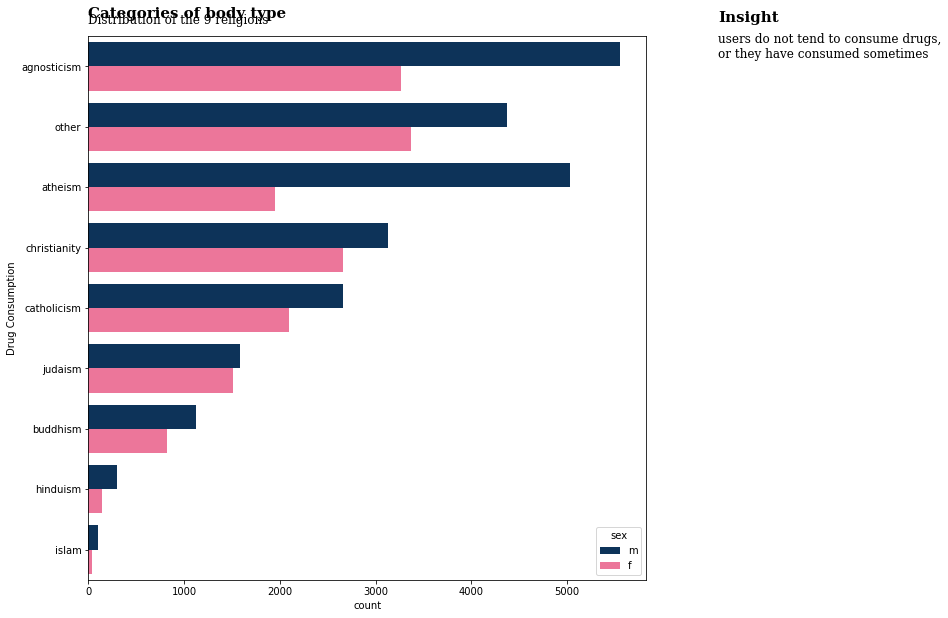

In [173]:
## Plot distributions of age groups
categories = profiles.religion_clean.nunique()

plt.figure(figsize=(10, 10))
sns.countplot(y=profiles.religion_clean, hue=profiles.sex, palette=palette, order = profiles['religion_clean'].value_counts().index)
plt.ylabel("Drug Consumption")
plt.text(0.5, -0.8, 'Categories of body type',
         fontsize=15, fontweight='bold', fontfamily='serif')
plt.text(0.5, -0.7, 'Distribution of the {} religions' .format(categories),
         fontsize=12, fontweight='light', fontfamily='serif')
plt.figtext(1, 0.9,  '''Insight''', fontsize=15,
            fontweight='bold', fontfamily='serif')
plt.figtext(1, 0.85,  '''users do not tend to consume drugs,
or they have consumed sometimes ''',
            fontsize=12, fontweight='light', fontfamily='serif')

pd.DataFrame(profiles["religion_clean"].value_counts(normalize=True, dropna=False))


## Sign

In [181]:
## Investigate religions
pd.DataFrame(profiles["sign"].value_counts(normalize=True, dropna=False))

,sign
NaN,0.184433
gemini and it&rsquo;s fun to think about,0.029727
scorpio and it&rsquo;s fun to think about,0.029560
leo and it&rsquo;s fun to think about,0.028225
libra and it&rsquo;s fun to think about,0.027508
taurus and it&rsquo;s fun to think about,0.027358
cancer and it&rsquo;s fun to think about,0.026641
pisces and it&rsquo;s fun to think about,0.026557
sagittarius and it&rsquo;s fun to think about,0.026407
virgo and it&rsquo;s fun to think about,0.026257


In [174]:
#Clean sign column
profiles['sign_clean'] = profiles.sign.str.split().str.get(0)
print("Number of categories in Signs:",profiles.sign_clean.nunique())
print("categories:", profiles.sign_clean.unique())

profiles.sign_clean.value_counts()

Number of categories in Signs: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign_clean, dtype: int64

,sign_clean
NaN,0.184433
leo,0.072966
gemini,0.071898
libra,0.070180
cancer,0.070163
virgo,0.069079
taurus,0.069062
scorpio,0.068962
aries,0.066543
pisces,0.065826


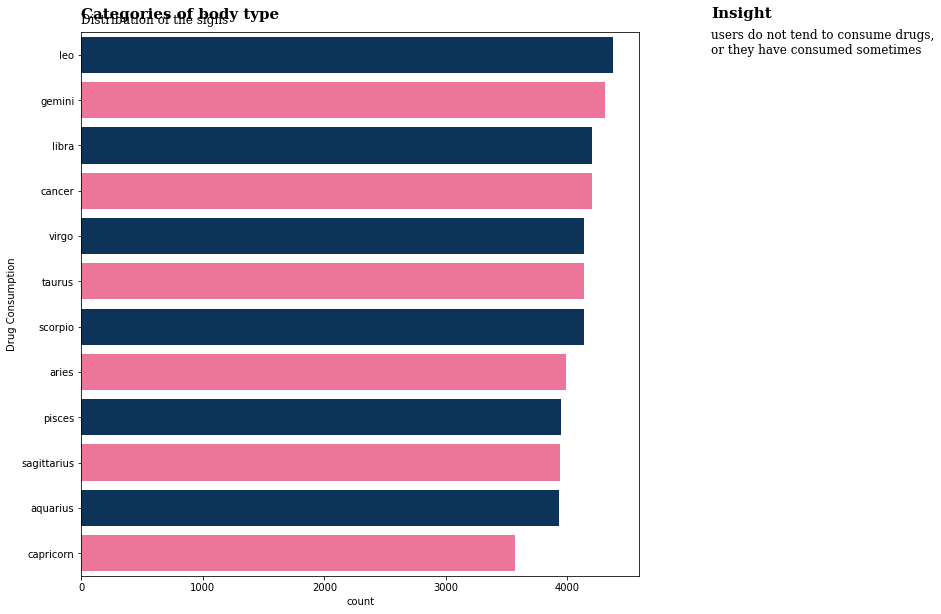

In [176]:
## Plot distributions of age groups
plt.figure(figsize=(10, 10))
sns.countplot(y=profiles.sign_clean, palette=palette, order = profiles['sign_clean'].value_counts().index)
plt.ylabel("Drug Consumption")
plt.text(0.5, -0.8, 'Categories of body type',
         fontsize=15, fontweight='bold', fontfamily='serif')
plt.text(0.5, -0.7, "Distribution of the signs",
         fontsize=12, fontweight='light', fontfamily='serif')
plt.figtext(1, 0.9,  '''Insight''', fontsize=15,
            fontweight='bold', fontfamily='serif')
plt.figtext(1, 0.85,  '''users do not tend to consume drugs,
or they have consumed sometimes ''',
            fontsize=12, fontweight='light', fontfamily='serif')

pd.DataFrame(profiles["sign_clean"].value_counts(normalize=True, dropna=False))

### Income

<AxesSubplot:xlabel='income', ylabel='Count'>

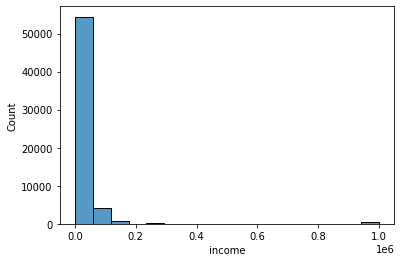

In [187]:
sns.histplot(profiles.income)

In [193]:
profiles.income.describe()

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64